# Dynamic Programming and Structural Econometrics #2

### Numerical implementation of simple deterministic DP problem: The cake eating problem

**Readings:** 
- 📖 Jerome Adda and Russell Cooper “Dynamic Economics. Quantitative Methods and Applications.” Chapters: 2-3

by Bertel Schjerning

University of Copenhagen


### This lecture
1. Numerical Implementation of Bellman operator and application of Value Function Iterations (VFI) 
1. Deterministic example problem: Cake Eating
    - Discretizing continuous states   
    - Discretizing continuous choices
    - Fully continuous choice
1. Stochatic example problem: Cake eating with stochastically scrinking or growing cake
    
    


### EXAMPLE: The cake eating problem

<img align="right" src="img/cake_eating.jpg" style="width:228px;">
- 📖 Adda and Cooper (2002), Section: 2.3-2.4  

- Cake of initial size $ W_0 $  
- How much of the cake to eat each period $ t $, $ c_t $?  
- Time is discrete, $ t=1,2,\dots,T $ where we may have $T=\infty$  
- What is not eaten in period $ t $ is left for the future $ W_{t+1}=W_t-c_t $  
- Overall goal is to maximize the discounted (expected) utility of cake consumption $u(c)$

$$
\max_{\{c_{t}\}_{0}^{T}}\sum_{t=0}^{T}\beta^{t}u(c_{t})
$$


### How does the cake eating problem fit in to the general MDP framework?
$$
V_t(s_t)=\max_{d_t \in D(s_t)} \big[u_t(s_t, d_t) + \beta \int V_{t+1}(s_{t+1})p(ds_{t+1}|s_t, d_t)  \big]
$$

- **Choices of the decision maker, $d_t \in D(s_t)$**
  - How much cake to eat, $c_t$
  - $c_t\in D(W_t)=[0,W_t]$
- **State variables problem**, $s_t\in S$
  - Single variable, the current size of the cake  $𝑊_t$
- **Preferences of the decision maker**, $u_t(s_t,d_t)$ and $\beta$
  - Utility flow from cake consumption, $u(c_t)$ (does not depend on state and time)  
  - Time constant discount factor, $\beta$  
- **Agent's beliefs about how the state will evolve given decisions**, $p(s_{t+1}|s_t, d_t)$
  - Transition is **deterministic by choice** (so p is degenerate)
  - We have $W_{t+1}=W_t-c_t$ with probability 1.

Bellman equation for cake eating problem
$$
V_t(W_t)=\max_{0<c_t<W_t} \big[u(c_t) + \beta V_{t+1}(W_t-c_t)  \big]\\
$$

### Bellman equation (recursive problem)

$$
\begin{eqnarray*}
  V(W_{0}) & = & \max_{\{c_{t}\}_{0}^{\infty}}\sum_{t=0}^{\infty}\beta^{t}u(c_{t}) \\
  & = & \max_{0 \le c_{0}\le W_0}\{u(c_{0})+\beta\max_{\{c_{t}\}_{1}^{\infty}}\sum_{t=1}^{\infty}\beta^{t-1}u(c_{t})\} \\
  & = & \max_{0 \le c_{0}\le W_0}\{u(c_{0})+\beta V(W_{1})\}
\end{eqnarray*}
$$

$$
V(W_{t})=\max_{0 \le c_{t} \le W_t}\big\{u(c_{t})+\beta V(\underset{=W_{t}-c_{t}}{\underbrace{W_{t+1}}})\big\}
$$

### Bellman equation and solution
#### Finite horizon
- **Value function** - maximum attainable utility, $ V_t(W_t)$  
$$V_t(W_t)=\max_{0<c_t<W_t} \big[u(c_t) + \beta \int V_{t+1}(W_t-c_t)  \big]$$

- **Policy function** - mapping from state space to action space that
  returns the optimal choice, $ c_t^{\star}(W_t) $  
$$c^{\star}_t(W_t)=\arg \max_{0<c_t<W_t} \big[u(c_t) + \beta \int V_{t+1}(W_t-c_t)  \big]$$

#### Infinite horizon
- **Value function** — maximum attainable utility, $ V(W)$   
$$V(W)=\max_{0<c<W} \big[u(c) + \beta \int V(W-c)  \big]$$
- **Policy function** — mapping from state space to action space that
  returns the optimal choice, $ c^{\star}(W) $  
$$c^{\star}(W)=\arg \max_{0<c<W} \big[u(c) + \beta \int V(W-c)  \big]
$$

### Maybe we can find analytic solution for the infinite horizon case?
- Consider the case where $T=\infty$ and $u(c)=\log(c)$
- We use the method of **"guess and verify"**: guess value function as verify that  bellman equation holds  

- Start with a (good) guess of $ V(W)=A+B\log W $  
  $$
  \begin{eqnarray*}
  V(W) & = & \max_{c}\big\{u(c)+\beta V(W-c)\big\} \\
  A+B\log W & = & \max_{c} \big\{\log c+\beta(A+B\log (W-c)) \big\}
  \end{eqnarray*}
  $$
- Determine $ A $ and $ B $ and find the optimal rule for cake
  consumption.  
- This is only possible in **few** and **trivial** models!  

### Let's do the math I
F.O.C. for $ c $

$$
\frac{1}{c} - \frac{\beta B}{W - c} = 0, \quad c = \frac {W} {1 + \beta B}, W - c = \frac {\beta B W} {1 + \beta B}
$$

Then we have

$$
A + B\log W = \log W + \log\frac{1}{1+\beta B} +
\beta A + \beta B \log W + \beta B \log\frac{\beta B}{1+\beta B} \\
$$
Set W=1
$$
A  = \beta A  + \log\frac{1}{1+\beta B} + \beta B \log\frac{\beta B}{1+\beta B}
$$
Collect terms with $\log W$ on RHS
$$
A + B\log W = \log\frac{1}{1+\beta B} +
\beta A + \beta B \log\frac{\beta B}{1+\beta B}+ (1+\beta B) \log W 
$$
Since this holds for all $W$ we must have 
$$
B = 1 + \beta B
$$

### Let's do the math II
- So we have

\begin{eqnarray*}
A  &=& \beta A  + \log\frac{1}{1+\beta B} + \beta B \log\frac{\beta B}{1+\beta B}\\
B &=& 1 + \beta B
\end{eqnarray*}

- Solve for A and B an insert in 

\begin{eqnarray*}
V(W)  &=&  \max_{c} \big\{\log c+\beta(A+B\log (W-c)) \big\} \\
c &=& \frac {W} {1 + \beta B}
\end{eqnarray*}


- After some algebra

$$
c^{\star}(W) =  \frac {W} {1 + \beta B} = \frac {W} {1 + \frac{\beta}{1-\beta}} = (1-\beta)W
$$

$$
V(W) = \frac{\log(W)}{1-\beta} + \frac{\log(1-\beta)}{1-\beta} + \frac{\beta \log(\beta)}{(1-\beta)^2}
$$

### Bellman operator for infinite horizon cake eating problem

The Bellman equation becomes operator in functional space

$$
\Gamma(V)(W) \equiv \max_{0 \le c \le W} \big[u(c)+\beta V(W-c)\big]
$$

The Bellman equations is then $ V(W) = \Gamma({V})(W) $, with the
solution given by the fixed point (solution to $ \Gamma({V}) = V $)

### Apply VFI

- Start with an arbitrary guess $ V_0(W) $
  (as we recall the initial guess is not important)  
- At each iteration $ n $ compute  


$$
\begin{eqnarray*}
V_n(W) = \Gamma(V_{n-1})(W) &=&
\max_{0 \le c \le W} \big\{u(c)+\beta V_{n-1}(W-c) \big \}  \\
c_{n-1}(W) &=&
\underset{0 \le c \le W}{\arg\max} \big\{u(c)+\beta V_{n-1}(W-c) \big \}
\end{eqnarray*}
$$

- Repeat until convergence  

### How do we numerically implement the Bellman operator?
**Problem 1: Cake size $W$ is continuous** $ \rightarrow $ value function is a function of continuous variable  
- Our solution: **discretize** $ W $
  Construct a *grid* (vector) of cake-sizes
  $ \vec{W}\in\{0,\dots\overline{W}\} $  


$$
V_{i}(\vec{W})=\max_{0 \le c \le \vec{W}}\{u(c)+\beta V_{i-1}(\vec{W}-c)\}
$$
- Compute value and policy function sequentially point-by-point


**Problem 2: Cake consumption $c$ is continuous** $ \rightarrow $ $W'=\vec{W}-c$ falls outside the grid for $\vec{W}$ 
- We need to be able to compute $V(\vec{W}-c)$
- May need to compute the value function *between grid points* 
$ \Rightarrow $ Interpolation and function approximation  


### Can interpolation be avoided?

- Note that conditional on $ W_t $, the choice of $ c $ defines
  $ W_{t+1} $  
- Can replace $ c $ with $ W_{t+1} $ in Bellman equation so
  that **next period cake size is the decision variable**  
- Solving “on the grid”  

### Adjustment to the Bellman equation

$$
V_{i}(\vec{W})=\max_{0 \le \vec{W}' \le \vec{W}}\{u(\vec{W}-\vec{W}')+\beta V_{i-1}(\vec{W}')\}
$$

- Compute value and policy function sequentially point-by-point  
- Note that grid $ \vec{W}\in\{0,\dots\overline{W}\} $ is used
  twice: for state space and for decision space  


*Can you spot the potential problem?*

In [1]:
import numpy as np
class cake_ongrid():
    '''Simple class to implement cake eating problem on the grid'''

    def __init__(self,beta=.9, Wbar=10, ngrid=50):
        '''Initializer'''
        self.beta = beta    # Discount factor
        self.Wbar = Wbar    # Upper bound on cake size
        self.ngrid = ngrid  # Number of grid points
        self.epsilon = np.finfo(float).eps # smallest positive float number
        self.grid = np.linspace(self.epsilon,Wbar,ngrid) # grid for both state and decision space

    def bellman(self,V0):
        '''Bellman operator, V0 is one-dim vector of values on grid'''
        c = self.grid - self.grid[:,np.newaxis] # current state in columns and choices in rows
        c[c==0] = self.epsilon # add small quantity to avoid log(0)
        mask = c>0 # mask off infeasible choices
        matV1 = np.full((self.ngrid,self.ngrid),-np.inf) # init V with -inf
        matV0 = np.repeat(V0.reshape(self.ngrid,1),self.ngrid,1) #current value function repeated in columns
        matV1[mask] = np.log(c[mask])+self.beta*matV0[mask] # maximand of the Bellman equation
        V1 = np.amax(matV1,axis=0,keepdims=False) # maximum in every column
        c1 = self.grid - self.grid[np.argmax(matV1,axis=0)] # consumption (index of maximum in every column)
        return V1, c1

    def solve(self, maxiter=1000, tol=1e-4, callback=None):
        '''Solves the model using VFI (successive approximations)'''
        V0=np.log(self.grid) # on first iteration assume consuming everything
        for iter in range(maxiter):
            V1,c1=self.bellman(V0)
            if callback: callback(iter,self.grid,V1,c1) # callback for making plots
            if np.all(abs(V1-V0) < tol):
                break
            V0=V1
        else:  # when i went up to maxiter
            print('No convergence: maximum number of iterations achieved!')
        return V1,c1


In [2]:
# evaluate belman, solve and print solution
model = cake_ongrid(beta=0.95,Wbar=10,ngrid=10)
W=model.grid
V0=np.log(W) # on first iteration assume consuming everything
V1,c1 = model.bellman(V0)
V2,c2 = model.bellman(V1)
V,c = model.solve()
print('W', W)
print('V0', V0)
print('V1', V1)
print('V', V)
print('c1', c1)
print('c2', c2)
print('c', c)


W [2.22044605e-16 1.11111111e+00 2.22222222e+00 3.33333333e+00
 4.44444444e+00 5.55555556e+00 6.66666667e+00 7.77777778e+00
 8.88888889e+00 1.00000000e+01]
V0 [-36.04365339   0.10536052   0.7985077    1.2039728    1.49165488
   1.71479843   1.89711998   2.05127066   2.18480206   2.30258509]
V1 [-70.28512411 -34.1361102    0.20545301   0.89860019   1.55709001
   1.96255512   2.34774697   2.63542904   2.90872701   3.13187056]
V [-720.87122071 -684.72220681 -650.3806436  -617.75615855 -586.76289775
 -557.31929999 -529.34788213 -502.77503515 -477.53083052 -453.54883613]
c1 [0.         1.11111111 1.11111111 2.22222222 2.22222222 3.33333333
 3.33333333 4.44444444 4.44444444 5.55555556]
c2 [0.         1.11111111 1.11111111 1.11111111 2.22222222 2.22222222
 2.22222222 3.33333333 3.33333333 3.33333333]
c [0.         1.11111111 1.11111111 1.11111111 1.11111111 1.11111111
 1.11111111 1.11111111 1.11111111 1.11111111]


### Let's plot value and policy functions for each iteration

In [3]:
import matplotlib.pyplot as plt
def vfi_plot(model, maxiter=1000, tol=1e-4):
    '''Illustrate solution'''
    fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(14,8))
    ax1.grid(which='both', color='0.65', linestyle='-')
    ax2.grid(which='both', color='0.65', linestyle='-')
    ax1.set_title('Value function convergence with VFI')
    ax2.set_title('Policy function convergence with VFI')
    ax1.set_xlabel('Cake size, W')
    ax2.set_xlabel('Cake size, W')
    ax1.set_ylabel('Value function')
    ax2.set_ylabel('Policy function')
    def callback(iter,grid,v,c):
        ax1.plot(grid[1:],v[1:],color='k',alpha=0.25)
        ax2.plot(grid,c,color='k',alpha=0.25)
    V,c = model.solve(maxiter=maxiter,tol=tol,callback=callback)
    # add solutions
    ax1.plot(model.grid[1:],V[1:],color='r',linewidth=2.5)
    ax2.plot(model.grid,c,color='r',linewidth=2.5)
    plt.show()
    return V,c


### How does the value and choice function change over iterations (or time if we consider $T<\infty$)

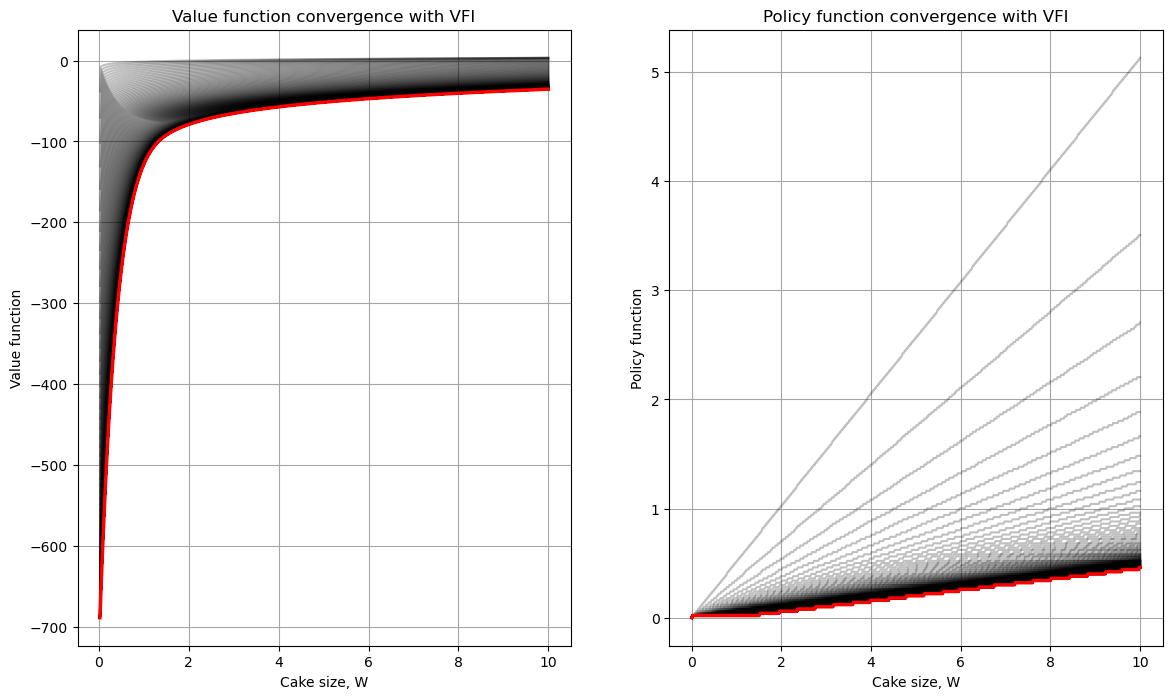

In [4]:
# plot value and policy function for each VFI 
model = cake_ongrid(beta=0.95,Wbar=10,ngrid=500)
V,c = vfi_plot(model)

### How to measure numerical errors?

- In our case there is an analytic solution  


$$
c^{\star}(W) = (1-\beta)W
$$

$$
V(W) = \frac{\log(W)}{1-\beta} + \frac{\log(1-\beta)}{1-\beta} + \frac{\beta \log(\beta)}{(1-\beta)^2}
$$

### When there is no analytic solution

We can find some **derived theoretical property** of the model
and check if it holds in the computed numerical solution

- Typically very dense (slow) grid is used in place of true solution  
- We’ll look at this in more detail later  

### Plot for comparison of analytical and numerical solution

In [5]:
def check_solution(model):
    # Analytical solution
    V_an = lambda w: np.log(w)/(1 - model.beta) + np.log(1 - model.beta)/(1 - model.beta) + model.beta*np.log(model.beta)/((1 - model.beta)**2)
    c_an = lambda w: (1 - model.beta) * w
    
    V,c = model.solve()
    W=model.grid; 
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
    ax1.plot(W,c_an(W),linewidth=1.5)
    ax1.plot(W,c,linewidth=1.5)
    ax1.set_ylabel("Policy function, c(W)"); ax1.set_xlabel("Cake size, W "); 
    ax1.legend(['Analytical', 'Numerical'], loc=4)
    ax2.plot(W,V_an(W),linewidth=1.5)
    ax2.plot(W,V,linewidth=1.5)
    ax2.set_ylabel("Value function, V(W)"); ax2.set_xlabel("Cake size, W ")
    ax2.legend(['Analytical', 'Numerical'], loc=4)    
    

### Comparison of analytical and numerical solution

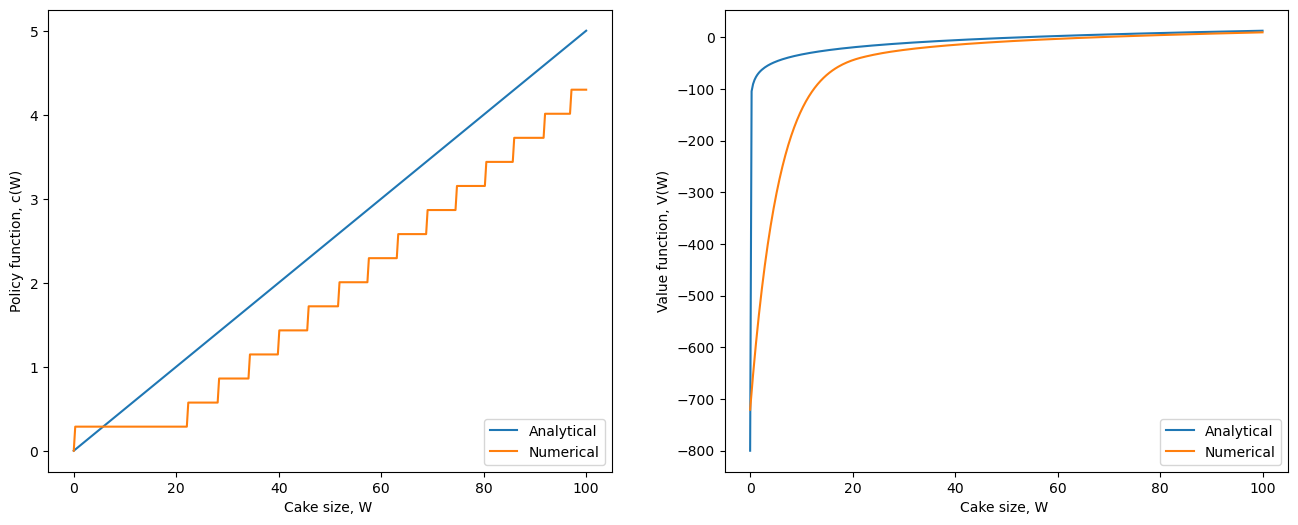

In [6]:
# Comparean alytical and numerical solution¶
m1 = cake_ongrid(beta=0.95,Wbar=100,ngrid=350)
check_solution(m1)

### Can we improve the numerical solution?
- Solving “on the grid” allows to avoid interpolation of the value function, but leads to huge inaccuracies for low levels of wealth! 
- We could offcourse just make the grid more dense, but this is computational costly
- Better solution:
    1. **discretize the choice** variable (to avoid solving continuous optimization problem for each value of wealth)  
    1. **use interpolation** of already computed next period value function  



### Cake eating with discretized choices

*Control for grid over state space separately from the discretization of
the choice variables to increase accuracy*

- As before solve cake eating Bellman equation by VFI  
- Discretize state space with $ \vec{W}\in\{0,\dots\overline{W}\} $  
- Discretize decision space with
  $ \vec{D}\in\{0,\dots\overline{D}\} $, usually
  $ \overline{D}=\overline{W} $  


$$
V_{n}(\vec{W})=\max_{c \in \vec{D}}\{u(c)+\beta V_{n-1}(\vec{W}-c)\}
$$

### Interpolation of the value function
- We still compute value/policy function point-by-point on grid $ \vec{W} $  
- Find the maximum over the points of grid $ \vec{D} $ that satisfy
  the choice set condition $ 0 \le \vec{D} \le W $  
- In each iteration, the value function $ V_{n}(\vec{W}) $ is
  computed on a set of grid points  
- But for iteration $ n+1 $ we need to compute
  $ V_{n}(\vec{W}-c)=V_{n}(\vec{W}-\vec{D}) $ 
- Since $\vec{W}-\vec{D}$ may not be found in $\vec{W}$ we need to **interpolate of the value function**  

In [7]:
import numpy as np
from scipy import interpolate # Interpolation routines
from time import process_time

class cake_discretized():
    '''Class to implement the cake eating model with discretized choice'''

    def __init__(self,beta=.9, Wbar=10, ngrid=50, nchgrid=100, optim_ch=True):
        '''Initializer'''
        self.beta = beta    # Discount factor
        self.Wbar = Wbar    # Upper bound on cake size
        self.ngrid = ngrid  # Number of grid points
        self.nchgrid = nchgrid  # Number of grid points for choice grid
        self.epsilon = np.finfo(float).eps # smallest positive float number
        self.grid = np.linspace(self.epsilon,Wbar,ngrid) # grid for state space
        self.chgrid = np.linspace(self.epsilon,Wbar,nchgrid) # grid for decision space
        self.optim_ch = optim_ch

    def bellman(self,V0):
        '''Bellman operator, V0 is one-dim vector of values on state grid'''
        c = self.chgrid[:,np.newaxis]  # column vector
        if self.optim_ch:
            c = c + np.zeros(self.ngrid)  # matrix of consumption values
            c *= self.grid/self.Wbar  # scale choices to ensure c<W
        W = self.grid  # one-dim (like row vector)
        interp = interpolate.interp1d(self.grid,V0,bounds_error=False,fill_value='extrapolate')
        matV1 = np.log(c) + self.beta * interp(W-c)
        matV1[c>W] = -np.inf  # infeasible choices
        V1 = np.amax(matV1,axis=0,keepdims=False) # maximum in every column
        if self.optim_ch:
            c1 = c[np.argmax(matV1,axis=0),np.arange(self.ngrid)] # max over feasible choices
        else:
            c1 = c[np.argmax(matV1,axis=0)]  # consumption (index of maximum in every column)
        return V1, c1

    def solve(self, maxiter=1000, tol=1e-4, callback=None):
        '''Solves the model using VFI (successive approximations)'''
        tic = process_time() # Start the stopwatch / counter

        V0=np.log(self.grid) # on first iteration assume consuming everything
        for iter in range(maxiter):
            V1,c1=self.bellman(V0)
            if callback: callback(iter,self.grid,V1,c1) # callback for making plots
            if np.all(abs(V1-V0) < tol):
                toc = process_time() # Stop the stopwatch / counter
                print('cake_discretized solved in', iter, 'iterations, using',round(toc-tic, 5), 'seconds')
                break
            V0=V1
        else:  # when i went up to maxiter
            print('No convergence: maximum number of iterations achieved!')
        return V1,c1

### How to increase the accuracy?

- increase the number of grid points, both in state space and especially in choice space  
- optimize the use of the grid points in the choice space by accounting for the constraints of the model  
- relocate the state grid points towards the ares of higher curvature of the value function  
- use a more sophisticated approximation technique  

cake_discretized solved in 121 iterations, using 0.08449 seconds
cake_discretized solved in 121 iterations, using 0.37588 seconds


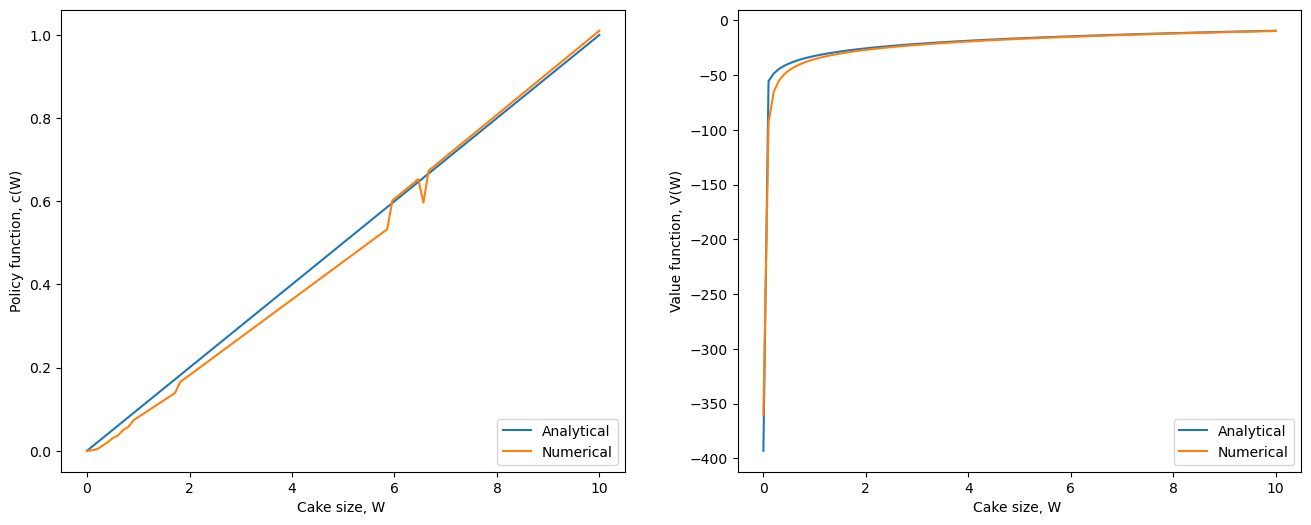

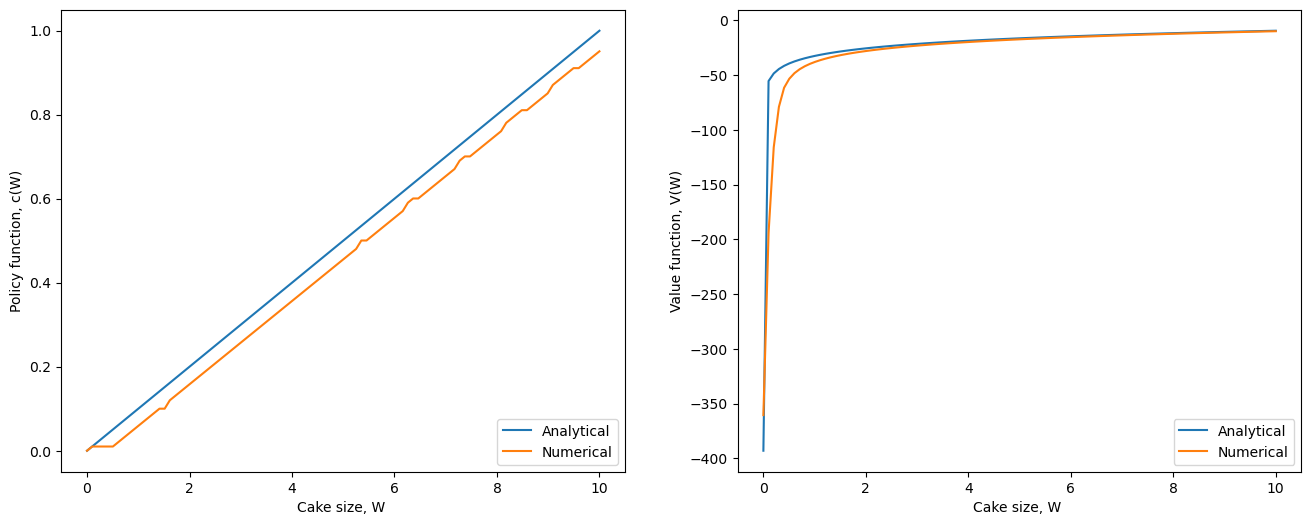

In [8]:
# m1 = cake_ongrid(     beta=0.9,Wbar=10,ngrid=50)
m1 = cake_discretized(beta=0.9,Wbar=10,ngrid=100,nchgrid=100,optim_ch=True)
m2 = cake_discretized(beta=0.9,Wbar=10,ngrid=100,nchgrid=1000,optim_ch=False)
check_solution(m1)
check_solution(m2)

cake_discretized solved in 121 iterations, using 0.1013 seconds


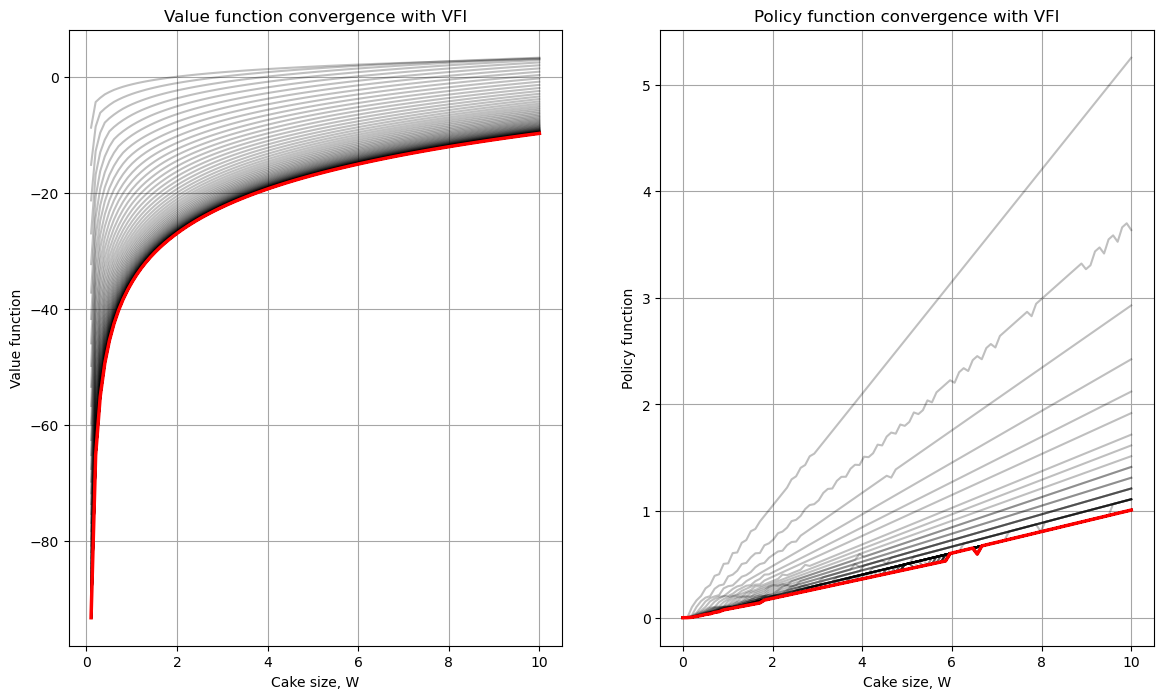

In [9]:
m2 = cake_discretized(beta=0.9,Wbar=10,ngrid=100,nchgrid=100,optim_ch=True)
V2,c2 = vfi_plot(m2) # make convergence plot

### Continuous maximization over c rather that discretized grid

In [10]:
import numpy as np
from scipy.optimize import minimize_scalar
from scipy import interpolate # Interpolation routines
from time import process_time

class cake_cont_choice():
    '''Class to implement the cake eating model with discretized choice'''

    def __init__(self,beta=.9, Wbar=10, ngrid=50, maxiter_c=20, tol_c=1e-8):
        '''Initializer'''
        self.beta = beta    # Discount factor
        self.Wbar = Wbar    # Upper bound on cake size
        self.ngrid = ngrid  # Number of grid points
        self.epsilon = np.finfo(float).eps # smallest positive float number
        self.grid = np.linspace(self.epsilon,Wbar,ngrid) # grid for state space
        self.maxiter_c = maxiter_c # max iterations in search for c
        self.tol_c = tol_c # tolerance in search for c


    def bellman(self,V0):
        '''Bellman operator, V0 is one-dim vector of values on state grid'''
        W = self.grid  # grid over cake size (wealth)
        V1=np.empty(self.ngrid,dtype='float')    # allocate space for the policy function
        c1=np.empty(self.ngrid,dtype='float')    # allocate space for the value function

        interp = interpolate.interp1d(self.grid,V0,bounds_error=False,fill_value='extrapolate')
        
        opt = {'maxiter':self.maxiter_c, 'xatol':self.tol_c} # options for optimzier
        neg_v1_c = lambda c, W : -(np.log(c) + self.beta * interp(W-c)) # minimize (netaive of) value given c
        for i in range(self.ngrid):        # loop over state space
            res = minimize_scalar(neg_v1_c,args=W[i], method='Bounded',bounds=[W[0],W[i]],options=opt) # result from minimize_scalar
            c1[i] = res.x # optimal consumption in state W[i]
            V1[i] = -neg_v1_c(c1[i], W[i]) # value function, don't forget the negation!
        return V1, c1

    def solve(self, maxiter=1000, tol=1e-4, callback=None):    
        '''Solves the model using VFI (successive approximations)'''
        tic = process_time() # Start the stopwatch / counter
        V0=np.log(self.grid) # on first iteration assume consuming everything
        for iter in range(maxiter):
            V1,c1=self.bellman(V0)
            if callback: callback(iter,self.grid,V1,c1) # callback for making plots
            if np.all(abs(V1-V0) < tol):
                toc = process_time() # Stop the stopwatch / counter
                print('cake_cont_choice solved in', iter, 'iterations, using',round(toc-tic, 5), 'seconds')
                break
            V0=V1
        else:  # when i went up to maxiter
            print('No convergence: maximum number of iterations achieved!')
        return V1,c1

### Comparison of discretized and continuous choice solutions 

cake_discretized solved in 121 iterations, using 0.05959 seconds
cake_cont_choice solved in 121 iterations, using 3.25127 seconds


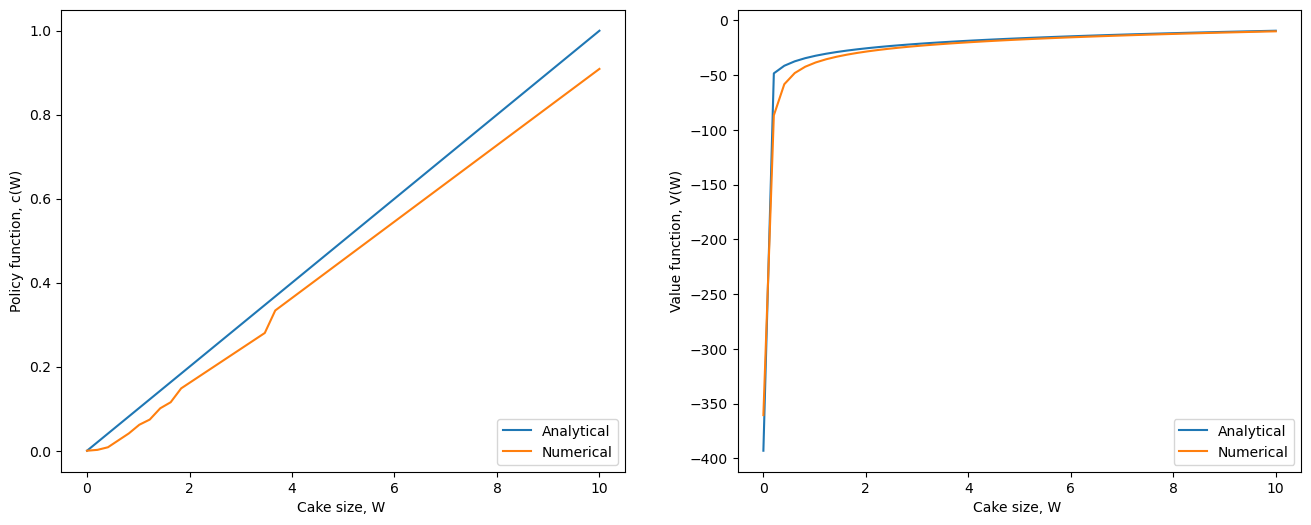

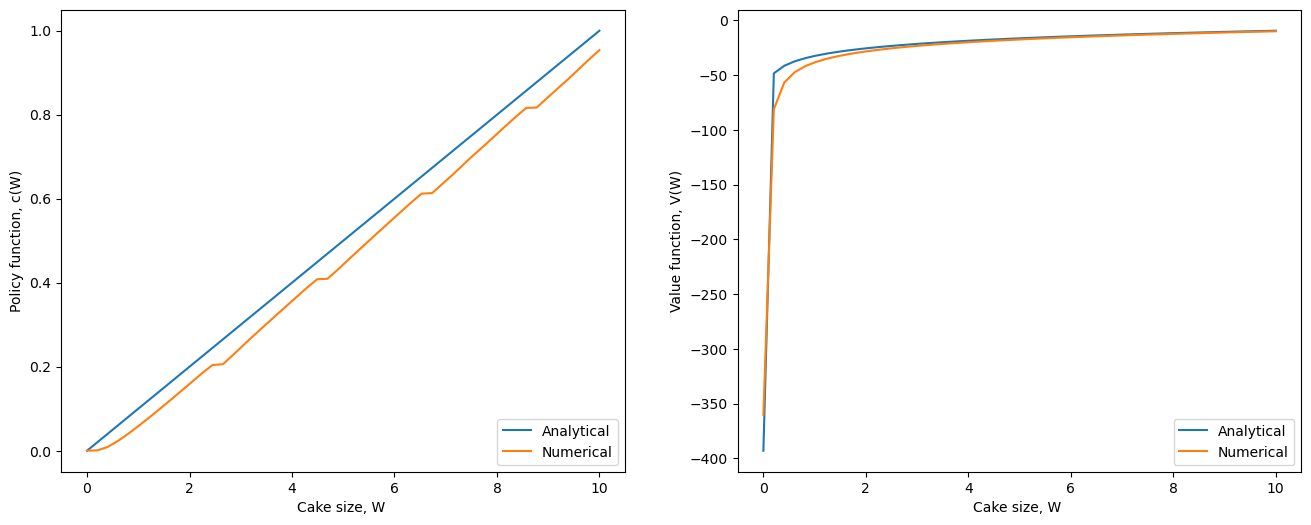

In [11]:
md = cake_discretized(beta=0.90,Wbar=10,ngrid=50,nchgrid=100,optim_ch=True)
mc=cake_cont_choice(  beta=0.90, Wbar=10,ngrid=50, tol_c=1e-6)
check_solution(md)
check_solution(mc)

### Performance of continuous choice solution
- DISCLAIMER: Quick and dirty implementations
- How could we improve
    - Use iterative gradient based (Newton type) method (requires objective function to be smooth)
    - Use information about solution from previous iteration or similar grid points (e.g. as starting point for newton)

### How to eat a stochastically growing or shrinking cake ?
- So far the evolution of states was deterministic by choice

$$W_{t+1}=W_{t}-c_t$$

- What if **cake stochastically grows** every period by $\varepsilon_t$ so that

$$W_{t+1}=W_{t}-c_t+\varepsilon_t$$

- Assume $\varepsilon_t$ has a **discrete distribution** with $K$ points of support
   $$\varepsilon_t=\varepsilon_i \text{ with probability } \pi_i\ge 0, i=1,\dots,K, \text{ and } \sum_{i=1}^K \pi_i=1$$

### Do we need more state variables? 
- Note that $\pi_i$ are constant for each $i$, so that the distribution of $\varepsilon_t$ does not depend previous shocks - or any states or decisions. 
- We could easily allow the distribution of $\varepsilon_t$ to depend on choices or other states. This would not require new state variables 
- But if we were to allow for serial dependence in $\varepsilon_t$, we would need to include past shocks as a state variable. Otherwise, how would the agent be able to form beliefs about $\varepsilon_t$?


### States, decisions and preferences are unchanged 
- Recall our the general framework for the finite horizon problem
$$
V_t(s_t)=\max_{d_t \in D(s_t)} \big[u_t(s_t, d_t) + \beta \int V_{t+1}(s_{t+1})p(ds_{t+1}|s_t, d_t)  \big]
$$
- Note that since $p(s_{t+1}|s_t, d_t)$ has discrete support, the integral turns in to a sum over the possible points of support. 


- **States:**  Single state, current cake size $s_t = W_t$
- **Choices:** Same choice variable $d_t=c_t$ and state dependent choice set $c_t\in D(W_t)=[0,W_t]$
- **Payoffs:** Utility flow only depend on current cake consumption, $u_t(s_t, d_t)=u_t(W_t, c_t)=u(c_t)$

- But the state transition $p(s_{t+1}|s_t, d_t) =p(W_{t+1}|W_t, c_t)$ is no longer degenerate

$$p(W_{t+1}=W_t-c_t+\varepsilon_i|W_t, c_t)=\pi_i$$ 



### Bellman equation for the stochastic problem 
- Given our specification of states, choices, preferences and beleifs on the previous slide, the Bellman equation for our stochastic cake eating model becomes

\begin{eqnarray}
V_t(W_t)&=&\max_{c_t \in [0,W_t] } \big[u(c_t) + \beta \sum_{i=1}^K \ V_{t+1}(W_{t+1})p(W_{t+1}=W_t-c_t+\varepsilon_i|W_t, c_t)  \big] \\
&=&\max_{c_t \in [0,W_t] } \big[u(c_t) + \beta \sum_{i=1}^K V_{t+1}(W_t-c_t+\varepsilon_i)\pi_i \big] 
\end{eqnarray}

- For the infinite horizon problem the Bellman equation is defined by the Bellman operator $\Gamma$
$$
\Gamma(V)(W)=\max_{c \in [0,W] } \big[u(c) + \beta \sum_{i=1}^K V(W-c+\varepsilon_i)\pi_i \big] 
$$
and the value function is the unique fixed point $V =\Gamma(V)$

### Python implementation 

In [12]:
import numpy as np
from scipy import interpolate # Interpolation routines
from time import process_time

class cake_stochastic():
    '''Class to implement the stochastic cake eating model with discretized choice'''

    def __init__(self,β=.9, wbar=[0, 10], n_w=50, n_c=100, Π=[.5,.5], ε=[1,1]):
        '''Initializer'''
        self.β  = β       # Discount factor
        self.wbar = wbar  # Upper and lower bound on cake sizez
        self.n_w = n_w    # Number of grid points for cake grid
        self.n_c = n_c    # Number of grid points for choice grid
        self.Π = Π       # probabilities for each shock
        self.ε = ε        # support points for income shocks, ε 

        self.wbar[0] = np.maximum(np.finfo(float).eps, self.wbar[0]);  # truncate lower bound at smallest positive float number
        # parameter dependent varibles
        self.w = np.linspace(self.wbar[0],self.wbar[1],n_w).reshape((n_w,1)) # grid for state space (n_w x1 array)
        self.c = np.empty((n_w,n_c)) # initilize grid for choices for each statye point 
        for i in range(n_w):
            self.c[i,:] = np.linspace(self.wbar[0],self.w[i],n_c).reshape((1,n_c)) # make grid between that satisfies the constraint, c\in[0,W] 

    def util(self,c):
        '''Utility function'''
        u=np.log(c)
        return u

    def bellman(self,V0):
        '''Bellman operator, V0 is one-dim vector of values on state grid'''
        interp = interpolate.interp1d(self.w[:,0],V0,  bounds_error=False,fill_value='extrapolate')
        EV=0 
        for i, ε_i in enumerate(self.ε): # compte expectation wrt to shocks to future state
            w1=self.w-self.c + ε_i # next period w, conditional of w and c, shock, nW x nC
            EV+=interp(w1)*self.Π[i]
        matV1 = self.util(self.c) + self.β * EV        
        i_max= np.argmax(matV1,axis=1); # (column) index of optimal choices
        V1 = matV1[np.arange(self.n_w),i_max]  
        c1 = self.c[np.arange(self.n_w),i_max] 
        return V1, c1

    def solve(self, maxiter=1000, tol=1e-10, callback=None):
        '''Solves the model using VFI (successive approximations)'''
        tic = process_time() # Start the stopwatch / counter

        V0=np.log(self.w[:,0]) # on first iteration assume consuming everything
        for iter in range(maxiter):
            V1,c1=self.bellman(V0)
            if callback: callback(iter,self.w,V1,c1) # callback for making plots
            if np.all(abs(V1-V0) < tol):
                toc = process_time() # Stop the stopwatch / counter
                print('cake_discretized solved in', iter, 'iterations, using',round(toc-tic, 5), 'seconds')
                break
            V0=V1
        else:  # when i went up to maxiter
            print('No convergence: maximum number of iterations achieved!')
        return V1,c1
    


### Let's solve the model w. discrete stochastic shocks

cake_discretized solved in 450 iterations, using 0.63162 seconds
cake_discretized solved in 449 iterations, using 1.10444 seconds


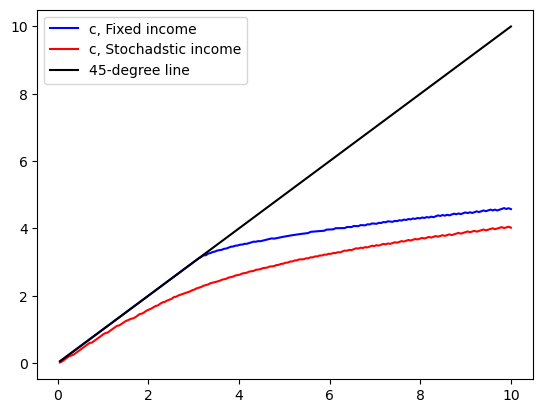

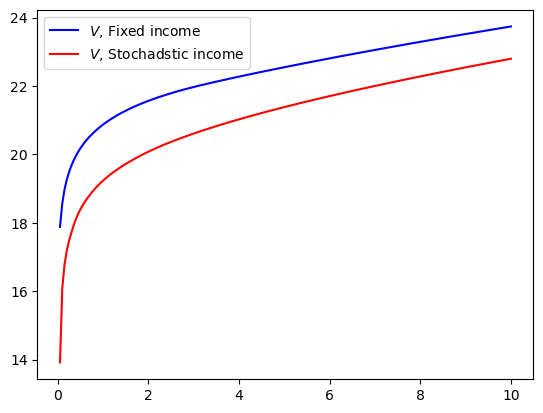

In [13]:
import matplotlib.pyplot as plt
m1=cake_stochastic(β=0.95, wbar=[0, 10], n_w=200, n_c=200, Π=[1], ε=[3])   # Fixed income
m2=cake_stochastic(β=0.95, wbar=[0, 10], n_w=200, n_c=200, Π=[0.1,.9], ε=[0,3/.9]) # Stochadstic income
V1, c1= m1.solve()
V2, c2= m2.solve()
plt.plot(m1.w[1:], c1[1:], color='b', label='c, Fixed income')
plt.plot(m1.w[1:], c2[1:], color='r',label='c, Stochadstic income')
plt.plot(m1.w[1:], m1.w[1:], color='k',label='45-degree line')
plt.legend();plt.show()
plt.plot(m1.w[1:], V1[1:], color='b', label='$V$, Fixed income')
plt.plot(m1.w[1:], V2[1:], color='r', label='$V$, Stochadstic income')
plt.legend();plt.show()

### Some lessons from this lecture
We illustrated what we learned in the previous lecture; 
1. Finite horizon models
    - Solution is indexed by time
    - Can be solved by backward induction
    - (VFI staring in the last period $T$ and moving back to period t=0).   
1. In infinite horizon problems
    - The value function and decision rules are are stationary. 
    - Solution is found as fixed point on Bellman Operator. 
    - Solution is unique and VFI is guaranteed to converge if Bellman operator is a contraction. 
    - VFI slows down when $\beta$ is close to 1

..and learned that numerical implementation makes a big difference

3. Numerical Implementation of Bellman operator for simple deterministic cake eating problem
    -  Same grid for current and future states, avoids interpolation but gives inaccurate solution   
    - With separate grids for choice and state, we can improve grid for the choice space by imposing the constraints of the model. 
    - We should relocate the state grid points to the ares of higher curvature of the value function
    - Our implementation of continuous choice solution appear rather slow compared to discretized solution
4. Stochastic shocks to "cake"-income gives precautionart savings motive

### References and further learning resources

- 📖 Adda and Russell Cooper “Dynamic Economics. Quantitative Methods and Applications.” *Chapters: 2, 3.3*  
- QuantEcon: Quantitative Economics with Python [https://python.quantecon.org/intro.html](https://python.quantecon.org/intro.html)  
- QuantEcon: Advanced Quantitative Economics with Python [https://python-advanced.quantecon.org/intro.html](https://python-advanced.quantecon.org/intro.html)